# NB3. Models of Networks

Professor: Ing. Didier Gamboa


Student: Walter Roberto Vives Castro


DATA 8A

## A. Models of Networks.

Consider the following [Graph Generators](https://networkx.github.io/documentation/stable/reference/generators.html):

**Random Network Model**: The function ```erdos_renyi_graph(n,p)``` returns a $G_n,p$ random graph with the following parameters:
* n - The number of nodes.
* p - Probability fo edge creation.

**Small World Model ** : The function ```watts_strogatz_graph(n,k,p)``` returns a small-world graph with the following parameters:
* n - The number of nodes.
* k - Each node is joined with its k nearest neighbors in a ring topology.
* p - The probability of rewiring each edge.

### Task 1

Simulate different networks using the Erdos-Renyi Model considering the following parameters:

(a) N = 100, p = 0.20

(b) N = 100, p = 0.40

(c) N = 100, p = 0.60

(d) N = 100, p = 0.80

For each network plot its degree distribution. Additionally, make a comparative table including:
* Number of links.
* Expected number of links using the equation:
$$ \langle L \rangle = p \frac{N(N-1)}{2}$$
* Average degree.
* Expected average degrees using the equation:
$$\langle k \rangle = p(N-1)$$
* Density.
* Expected density using the equation:
$$\langle d \rangle = p$$
* Average Shortest Path.
* Expected Average Shortest Path using the equation:
$$\langle l \rangle \approx \frac{ln(N)}{ln(\langle k \rangle)}$$

In [1]:
# Libraries
import pandas as pd
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
# Random Network Model: erdos_renyi_graph(n,p) function
G_a = nx.erdos_renyi_graph(n = 100, p = 0.20)
G_b = nx.erdos_renyi_graph(n = 100, p = 0.40)
G_c = nx.erdos_renyi_graph(n = 100, p = 0.60)
G_d = nx.erdos_renyi_graph(n = 100, p = 0.80)

# Degrees
G_a_degrees = [G_a.degree(x) for x in G_a.nodes()]
G_b_degrees = [G_b.degree(x) for x in G_b.nodes()]
G_c_degrees = [G_c.degree(x) for x in G_c.nodes()]
G_d_degrees = [G_d.degree(x) for x in G_d.nodes()]

#### Plots

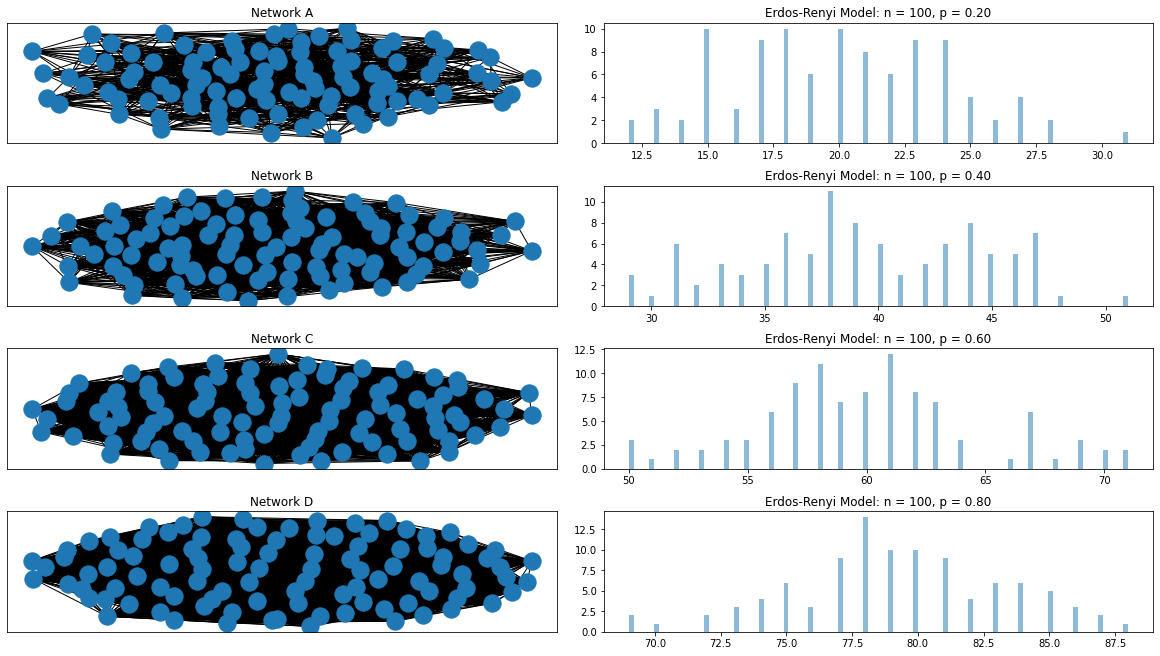

In [3]:
fig, axs = plt.subplots(4, 2, figsize=(16,9), constrained_layout=True)

# Network A
nx.draw_networkx(G_a, pos = nx.spring_layout(G_a), ax = axs[0, 0], with_labels = False)
axs[0, 0].set_title("Network A")

# Histogram A
a = axs[0, 1].hist(G_a_degrees, bins=100, alpha=0.5)
axs[0, 1].set_title("Erdos-Renyi Model: n = 100, p = 0.20")


################################################################################
# Network B
nx.draw_networkx(G_b, pos = nx.spring_layout(G_b), ax = axs[1, 0], with_labels = False)
axs[1, 0].set_title("Network B")

# Histogram B
axs[1, 1].hist(G_b_degrees, bins=100, alpha=0.5)
axs[1, 1].set_title("Erdos-Renyi Model: n = 100, p = 0.40")


################################################################################

# Network C
nx.draw_networkx(G_c, pos = nx.spring_layout(G_c), ax = axs[2, 0], with_labels = False)
axs[2, 0].set_title("Network C")

# Histogram C
axs[2, 1].hist(G_c_degrees, bins=100, alpha=0.5)
axs[2, 1].set_title("Erdos-Renyi Model: n = 100, p = 0.60")


################################################################################

# Network D
nx.draw_networkx(G_d, pos = nx.spring_layout(G_d), ax = axs[3, 0], with_labels = False)
axs[3, 0].set_title("Network D")

# Histogram D
axs[3, 1].hist(G_d_degrees, bins=100, alpha=0.5)
axs[3, 1].set_title("Erdos-Renyi Model: n = 100, p = 0.80")

################################################################################
plt.show()

#### Comparative table

For each network plot its degree distribution. Additionally, make a comparative table including:
* Number of links.
* Expected number of links using the equation:
$$ \langle L \rangle = p \frac{N(N-1)}{2}$$
* Average degree.
* Expected average degrees using the equation:
$$\langle k \rangle = p(N-1)$$
* Density.
* Expected density using the equation:
$$\langle d \rangle = p$$
* Average Shortest Path.
* Expected Average Shortest Path using the equation:
$$\langle l \rangle \approx \frac{ln(N)}{ln(\langle k \rangle)}$$

In [4]:
#### Equations ####
def expected_links(n,p):
    L = p*((n*(n-1))/2)
    return L


def expected_avg_degree(n, p):
    k = p*(n-1)
    return k


def expected_density(p):
    return p


def expected_avg_shortest_path(n, p):
    l = np.log(n)/np.log(expected_avg_degree(n, p))
    return l

def avg_degree_nx(G):
    avg_d = sum([x[1] for x in list(nx.degree(G))])/nx.number_of_nodes(G)
    return avg_d

In [5]:
##### Number of links #####

############################################################################

### A Network ###

# links
n_a = nx.number_of_nodes(G_a)
p_a = 0.20
G_a_links0 = nx.number_of_edges(G_a)
G_a_links1 = expected_links(n_a, p_a)

# Average Degree
G_a_avg0 = avg_degree_nx(G_a)
G_a_avg1 = expected_avg_degree(n_a, p_a)

# Density
G_a_density0 = nx.density(G_a)
G_a_density1 = expected_density(p_a)

# Average Shortest Path
G_a_shortest0 = nx.average_shortest_path_length(G_a)
G_a_shortest1 = expected_avg_shortest_path(n_a, p_a)

############################################################################

### B Network ###

# links
n_b = nx.number_of_nodes(G_b)
p_b = 0.40
G_b_links0 = nx.number_of_edges(G_b)
G_b_links1 = expected_links(n_b, p_b)

# Average Degree
G_b_avg0 = avg_degree_nx(G_b)
G_b_avg1 = expected_avg_degree(n_b, p_b)

# Density
G_b_density0 = nx.density(G_b)
G_b_density1 = expected_density(p_b)

# Average Shortest Path
G_b_shortest0 = nx.average_shortest_path_length(G_b)
G_b_shortest1 = expected_avg_shortest_path(n_b, p_b)

############################################################################

### C Network ###

# links
n_c = nx.number_of_nodes(G_c)
p_c = 0.60
G_c_links0 = nx.number_of_edges(G_c)
G_c_links1 = expected_links(n_c, p_c)

# Average Degree
G_c_avg0 = avg_degree_nx(G_c)
G_c_avg1 = expected_avg_degree(n_c, p_c)

# Density
G_c_density0 = nx.density(G_c)
G_c_density1 = expected_density(p_c)

# Average Shortest Path
G_c_shortest0 = nx.average_shortest_path_length(G_c)
G_c_shortest1 = expected_avg_shortest_path(n_c, p_c)

############################################################################

### D Network ###

# links
n_d = nx.number_of_nodes(G_d)
p_d = 0.80
G_d_links0 = nx.number_of_edges(G_d)
G_d_links1 = expected_links(n_d, p_d)

# Average Degree
G_d_avg0 = avg_degree_nx(G_d)
G_d_avg1 = expected_avg_degree(n_d, p_d)

# Density
G_d_density0 = nx.density(G_d)
G_d_density1 = expected_density(p_d)

# Average Shortest Path
G_d_shortest0 = nx.average_shortest_path_length(G_d)
G_d_shortest1 = expected_avg_shortest_path(n_d, p_d)


In [6]:
a = [G_a_links0, G_a_links1, G_a_avg0, G_a_avg1, G_a_density0, G_a_density1, G_a_shortest0, G_a_shortest1]
b = [G_b_links0, G_b_links1, G_b_avg0, G_b_avg1, G_b_density0, G_b_density1, G_b_shortest0, G_b_shortest1]
c = [G_c_links0, G_c_links1, G_c_avg0, G_c_avg1, G_c_density0, G_c_density1, G_c_shortest0, G_c_shortest1]
d = [G_d_links0, G_d_links1, G_d_avg0, G_d_avg1, G_d_density0, G_d_density1, G_d_shortest0, G_d_shortest1]

index = ["nx_links", "expected_links", "nx_avg_degree", "expected_avg_degree", "nx_degree","expected_density", "nx_avg_stst_path", "expected_avg_shortest_path"]
q = "avg_degree_nx"
columns = ["Network A", "Network B", "Network C", "Network D"]
data = zip(a, b, c, d)
df = pd.DataFrame(data = data, columns = columns, index = index)
df.T

,nx_links,expected_links,nx_avg_degree,expected_avg_degree,nx_degree,expected_density,nx_avg_stst_path,expected_avg_shortest_path
Network A,1003.0,990.0,20.06,19.8,0.202626,0.2,1.807475,1.542418
Network B,1966.0,1980.0,39.32,39.6,0.397172,0.4,1.602828,1.251803
Network C,3002.0,2970.0,60.04,59.4,0.606465,0.6,1.393535,1.127531
Network D,3962.0,3960.0,79.24,79.2,0.800404,0.8,1.199596,1.053338


### Task 2

Consider a the simulation of different random network with a fixed value of the number of nodes but different values of link probability. Naturally, at the beginig at p = 0, the system is totally fragmented into singletons. An increasing number of pairs of nodes will get connected, and through them connected subnetworks will be formed as the link probability increases. 

Erdos and Renyi discovered a transition point from configurations in which all subnetworks are relatively small, to a configuration where at least one of the subnetworks contains almost all the nodes. This transition can be observe in Fig. 1. 




<img src="Plot1.png" width="360"> </img>

<center> Fig. 2</center>


Don't forget that the probability and the expected degree $\langle k \rangle$  follow the relation:

$$ \langle L \rangle = p \frac{N(N-1)}{2}$$

Fig. 1 is an sketch of the evoluation. Reproduce a similar plot for networks with 1000 nodes. Use 25 equally spaced values of the link probability, in the interval [0, 0.005]. For each value, generate 20 different networks, compute the relative size of the giant component. 

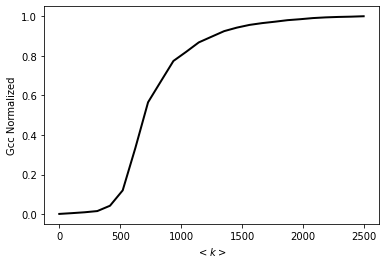

In [7]:
N = 1000
p = np.linspace(0, 0.005, 25)
Gcc_avg = []
k_avg = []
for i in range(0,25):
    Gcc_list = []
    k_list = []
    for _ in range(0,20):
        G_erdos = nx.erdos_renyi_graph(N, p[i])
        Gcc = sorted(nx.connected_components(G_erdos), key=len, reverse=True)
        G0 = len(list(G_erdos.subgraph(Gcc[0])))
        k = p[i] * ((N*(N-1))/2)
        Gcc_list.append(G0)
        k_list.append(k)
        
    Gcc_mean = np.mean(Gcc_list)
    K_mean = np.mean(k_list)
    Gcc_avg.append(Gcc_mean)
    k_avg.append(K_mean)

# normalize
Gcc_avg_normalized = [i/max(Gcc_avg) for i in Gcc_avg]
plt.plot(k_avg, Gcc_avg_normalized, color = "black",
         linewidth = 2, markersize = 12)
plt.xlabel("$<k>$")
plt.ylabel("Gcc Normalized")
plt.show()

### Task 3
In the Watts-Strogratz Model, there is range of rewiring probability values between p = 0.01 and p = 0.1 in the average shortest-path length is close to that of an equivalent random network; and at the same time, the clustering coefficient from the model is high. Nevertheless, the model cannot generate hubs. Fig. 2 presents the average path length and the clustering coefficient as a function of the rewiring probability. Observe that the x-axis is in a logarithmic scale.


<img src="Plot2.png" width="360"> </img>

<center> Fig. 2</center>


Reproduce a similar plot, by calculating:
* the average shortest path ($\langle l \rangle$)
* and the average clustering coefficient ($C$)

for Watts–Strogatz networks constructed for different values of the rewiring probability p. Take 20 equally spaced values of p between 0 and 1. For each value of p, build 20 different networks and compute the average shortest path and average clustering coefficient. To plot the two curves on a common y-axis, you can normalize the values by dividing them by the corresponding values for the probability p = 0.

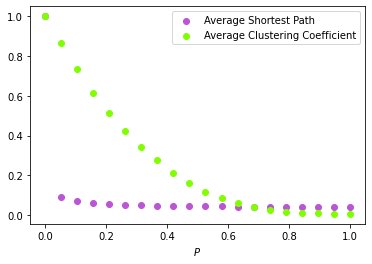

In [8]:
p = np.linspace(0, 1, 20).tolist()
list_avg_shortest = []
list_avg_clustering = [] 
for i in range(0,20):
    path_list = []
    clustering_list = []
    for _ in range(0,20):
        GW = nx.watts_strogatz_graph(n = 1000, k = 4, p = p[i])
        avg_shortest_path = nx.average_shortest_path_length(GW)
        clustering_coefficient = nx.average_clustering(GW)

        path_list.append(avg_shortest_path)
        clustering_list.append(clustering_coefficient)
    
    list_avg_shortest.append(np.mean(path_list))
    list_avg_clustering.append(np.mean(clustering_list))

# Normalized
norm_path = [x/list_avg_shortest[0] for x in list_avg_shortest]
norm_clustering = [x/list_avg_clustering[0] for x in list_avg_clustering]

# Scatter Plot
plt.scatter(p, norm_path, label = "Average Shortest Path", c = "mediumorchid", marker = "o")
plt.legend(loc='upper right')

plt.scatter(p, norm_clustering, label = "Average Clustering Coefficient", c = "chartreuse",  marker = "o")
plt.legend(loc='upper right')

plt.xlabel("$P$")
plt.show()

## B. Identification of Network Models [40 pts]

### Task 4
Analyze each of the 4 Networks and determine which of the three models was used to generate them:
* model1.csv
* model2.csv
* model3.csv
* model4.csv

Justify your selection in each case.

Models:
- Erdos
- Watts-Strogatz model (small world) 
- Watt-Strogatz (small-world model)
- Erdös-Rényi model

**Random Network Model**: The function ```erdos_renyi_graph(n,p)``` returns a $G_n,p$ random graph with the following parameters:
* n - The number of nodes.
* p - Probability fo edge creation.

**Small World Model ** : The function ```watts_strogatz_graph(n,k,p)``` returns a small-world graph with the following parameters:
* n - The number of nodes.
* k - Each node is joined with its k nearest neighbors in a ring topology.
* p - The probability of rewiring each edge.

Name: 
Type: Graph
Number of nodes: 99
Number of edges: 98
Average degree:   1.9798
Clustering Coefficient: 0.0
Density: 0.020202020202020204
It's connected: False
Triangles: 0


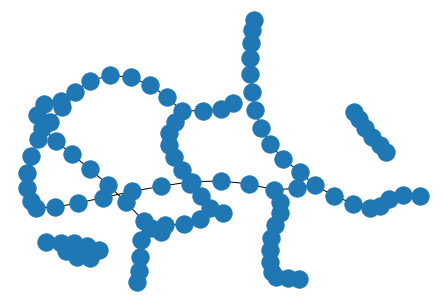

In [9]:
# Analysis of model1.csv (10 pts)
model_1 = pd.read_csv('model1.csv', index_col = 0)
G1 = nx.Graph(model_1.values)
print(nx.info(G1))
print("Clustering Coefficient: {}".format(nx.average_clustering(G1)))
print("Density: {}".format(nx.density(G1)))
print("It's connected: {}".format(nx.is_connected(G1)))
print("Triangles: {}".format(sum(nx.triangles(G1).values())))
nx.draw(G1, with_labels = False)

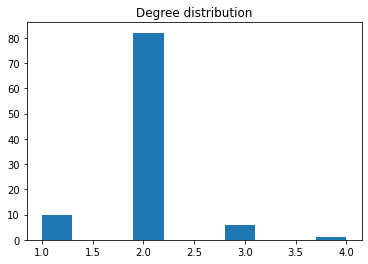

In [10]:
degree_distribution = [G1.degree(n) for n in G1.nodes()]
plt.hist(degree_distribution)
plt.title("Degree distribution")
plt.show()

**Justification 1**
This network was generated using the **Erdös-Rényi model** since there are not possible connections among the neighbours. Therefore, the network will have a low clustering coefficient, they do not generate local clustering and triadic closures. For small $p$ the degree distribution tends to have a binomial distribution, and in this case $p \approx 0.020$.

----

Name: 
Type: Graph
Number of nodes: 99
Number of edges: 728
Average degree:  14.7071
Clustering Coefficient: 0.1511961750605149
Density: 0.15007215007215008
It's connected: True
Triangles: 1557


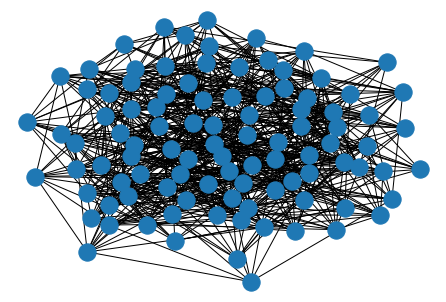

In [11]:
# Analysis of model2.csv (10 pts)
model_2 = pd.read_csv("model2.csv", index_col = 0)
G2 = nx.Graph(model_2.values)
print(nx.info(G2))
print("Clustering Coefficient: {}".format(nx.average_clustering(G2)))
print("Density: {}".format(nx.density(G2)))
print("It's connected: {}".format(nx.is_connected(G2)))
print("Triangles: {}".format(sum(nx.triangles(G2).values())))
nx.draw(G2, with_labels = False)

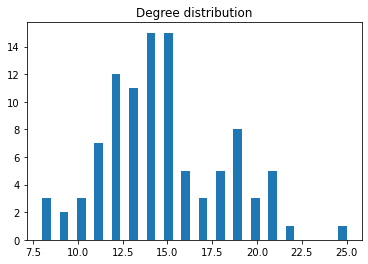

In [12]:
degree_distribution2 = [G2.degree(n) for n in G2.nodes()]
plt.hist(degree_distribution2, bins = 35)
plt.title("Degree distribution")
plt.show()

**Justification 2** The model used to generate the network was **Watts-Strogatz model** since each node has the same probability of rewriting an edge, this in order to generate a "realistic" network.

------

Name: 
Type: Graph
Number of nodes: 59
Number of edges: 787
Average degree:  26.6780
Clustering Coefficient: 0.8127828893579144
Density: 0.45996493278784334
It's connected: True
Triangles: 16101


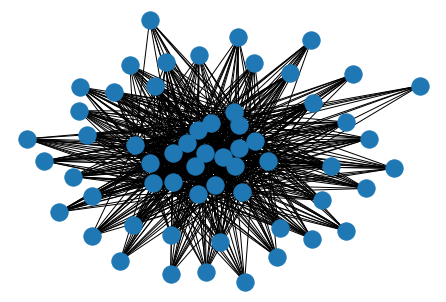

In [13]:
# Analysis of model3.csv (10 pts)
model_3 = pd.read_csv("model3.csv", index_col = 0)
G3 = nx.Graph(model_3.values)
print(nx.info(G3))
print("Clustering Coefficient: {}".format(nx.average_clustering(G3)))
print("Density: {}".format(nx.density(G3)))
print("It's connected: {}".format(nx.is_connected(G3)))
print("Triangles: {}".format(sum(nx.triangles(G3).values())))
nx.draw(G3, with_labels = False)

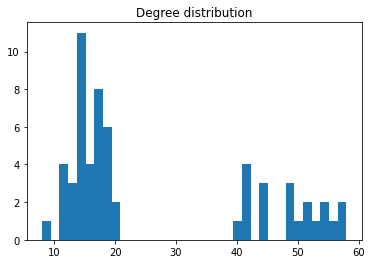

In [14]:
degree_distribution3 = [G3.degree(n) for n in G3.nodes()]
plt.hist(degree_distribution3, bins = 35)
plt.title("Degree distribution")
plt.show()

**Justification 3** The model used was Watts–Strogatz since it has a high clustering coefficient; it can be used to represent a social network, in the case of Erdös-Rényi model it can not be a fact. Also, the network has several triangles, something that is not present in the Erdös-Rényi model.

Name: 
Type: Graph
Number of nodes: 99
Number of edges: 98
Average degree:   1.9798
Clustering Coefficient: 0.0
Density: 0.020202020202020204
It's connected: True
Triangles: 0


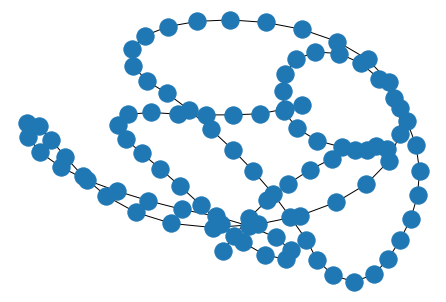

In [15]:
# Analysis of model4.csv (10 pts)
model_4 = pd.read_csv("model4.csv", index_col = 0)
G4 = nx.Graph(model_4.values)
print(nx.info(G4))
print("Clustering Coefficient: {}".format(nx.average_clustering(G4)))
print("Density: {}".format(nx.density(G4)))
print("It's connected: {}".format(nx.is_connected(G4)))
print("Triangles: {}".format(sum(nx.triangles(G4).values())))
nx.draw(G4, with_labels = False)

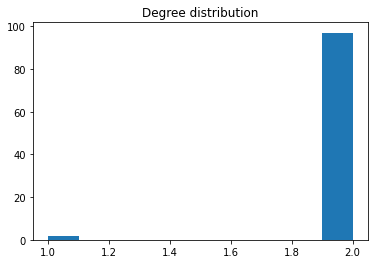

In [16]:
degree_distribution4 = [G4.degree(n) for n in G4.nodes()]
plt.hist(degree_distribution4, bins = 10)
plt.title("Degree distribution")
plt.show()

**Justification 4** The model used was **Erdős–Rényi model** given the result of the metrics, it can be noticed a low clustering coefficient. Each node has the same problabilitiy $p$ to appear, this represents a low bias. Therefore, that behavior is not a characteristic of the Wattz Strogaz model since that model solves that problem that this model presents.

## References
[1] F. Mencszer, S. Fortunato, C. A. Davis (2020). A First Course in Network Science.

----

----